In [29]:
#Libraries the last one is for the test function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [30]:
def objective_function(var1, var2):
    return -np.exp(-0.5 * (var1 * var2 - 0.75)**2 - 2 * (var1 - 1.5)**2)

In [31]:
def compute_objective(variables):
    var1, var2 = variables
    return objective_function(var1, var2)

In [32]:
# Constraint
def constraint_condition(variables):
    var1, var2 = variables
    return 1 / (var1 + 1 / 3) - var2 - 0.5

In [33]:
# Contour
def plot_contour(var1_values, var2_values):
    grid_var1, grid_var2 = np.meshgrid(var1_values, var2_values)
    function_values = objective_function(grid_var1, grid_var2)
    plt.contour(grid_var1, grid_var2, function_values, levels=20, cmap="viridis")
    plt.xlabel('var1')
    plt.ylabel('var2')
    plt.title('Contour Plot')

In [34]:
def plot_constraint():
    var1_constraint = np.linspace(0, 2.5, 100)
    var2_constraint = 1 / (var1_constraint + 1 / 3) - 0.5
    plt.plot(var1_constraint, var2_constraint, 'b-', linewidth=1.5, label='Constraint')

In [35]:
# Optimzation
def perform_optimization(initial_point):
    constraint_config = {'type': 'ineq', 'fun': constraint_condition}
    result = minimize(compute_objective, initial_point, method='SLSQP', constraints=constraint_config)
    optimal_point = result.x
    optimal_value = result.fun
    return optimal_point, optimal_value

In [36]:
# Test
def evaluate_success(optimal_value, var1_constraint, var2_constraint):
    success_count = sum(objective_function(v1, v2) > optimal_value for v1, v2 in zip(var1_constraint, var2_constraint))
    fail_count = 100 - success_count
    print(f'Successful cases: {success_count}, Unsuccessful cases: {fail_count}')

Initial point: [1.0, 1.0]
Minimum point: [1.4356297048248081, 0.0653025656435113]
Minimum function value: -0.7996198096744104
Successful cases: 100, Unsuccessful cases: 0


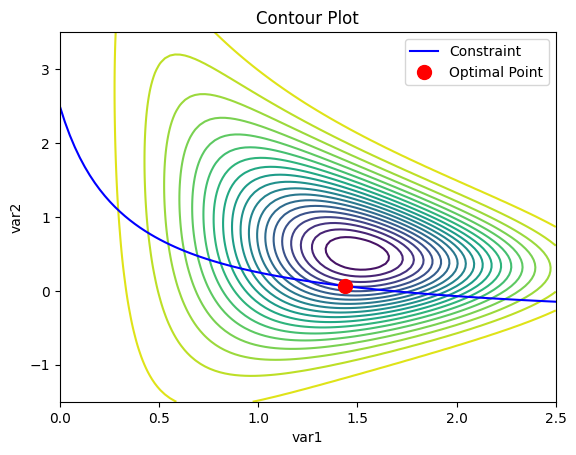

In [37]:
def run_optimization_test():
    # Range
    var1_values = np.linspace(0, 2.5, 100)
    var2_values = np.linspace(-1.5, 3.5, 100)
    
    # Plot
    plot_contour(var1_values, var2_values)
    plot_constraint()
    
    # Initial Point
    initial_point = [1.0, 1.0]
    optimal_point, optimal_value = perform_optimization(initial_point)
    print(f'Initial point: [{initial_point[0]}, {initial_point[1]}]')
    print(f'Minimum point: [{optimal_point[0]}, {optimal_point[1]}]')
    print(f'Minimum function value: {optimal_value}')
    plt.plot(optimal_point[0], optimal_point[1], 'ro', markersize=10, label='Optimal Point')
    var1_constraint = np.linspace(0, 2.5, 100)
    var2_constraint = 1 / (var1_constraint + 1 / 3) - 0.5
    evaluate_success(optimal_value, var1_constraint, var2_constraint)
    
    plt.xlim(0, 2.5)
    plt.ylim(-1.5, 3.5)
    plt.legend(loc='best')
    plt.show()

run_optimization_test()